In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [49]:
training_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")

print("The dimension of our training data frame is: ", training_data.shape)
print("The dimension of our training data frame is: ", test_data.shape)

The dimension of our training data frame is:  (891, 12)
The dimension of our training data frame is:  (418, 11)


CHACKING AND HANDLING MISSING VALUES BOTH IN TRAINING & TEST DATA

In [50]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

IMPUTATING MISSING VALUES IN TRAINING DATA & DROPPING CABIN VARIABLE

In [51]:
# Imputating missing values
training_data["Age"].fillna(training_data["Age"].mean(), inplace=True)
training_data['Embarked'].fillna(training_data['Embarked'].mode()[0], inplace=True)

# Droping Cabin variable
training_data.drop(columns='Cabin', axis=1,inplace=True)
training_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [52]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

IMPUTATING MISSING VALUES IN TEST DATA & DROPPING CABIN VARIABLE

In [53]:
# Imputating missing values
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

# Droping Cabin variable
test_data.drop(columns='Cabin', axis=1,inplace=True)

test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

CORRELATION FOR TRAINING DATA

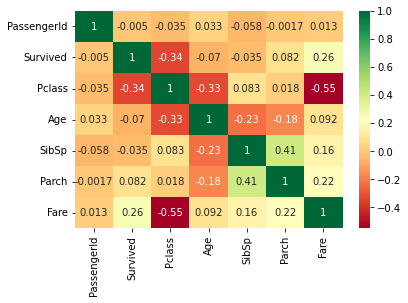

In [54]:
def corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    
corr(training_data)

CORRELATION FOR TEST DATA

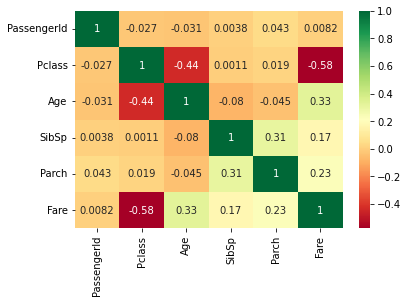

In [55]:
def corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    
corr(test_data)

RECODING OF CATEGORICAL VARIABLES (GENDER AND EMBARKED) BOTH FOR TRAINING AND TEST DATA

In [56]:
training_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
test_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [57]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [58]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


CREATING NEW VARIABLE FARE-BIN FROM FARE & SURVIVED USING TRAINING DATASET

In [59]:
from sklearn.cluster import KMeans
# Use KMeans to cluster fare data
fare_data = training_data[['Fare','Survived']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(training_data[['Fare','Survived']])
Fare_bin = kmeans.labels_


# Create a new variable 'fare bin'
training_data.loc[(training_data['Fare'] == 0), 'Fare-bin'] = 0
training_data.loc[(training_data['Fare'] > 0) & (training_data['Fare'] < 48), 'Fare-bin'] = 1
training_data.loc[(training_data['Fare'] >= 48), 'Fare-bin'] = 2

# Survival rates by fare bins
training_data.groupby(['Fare-bin'])['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Fare-bin,,,,,,,,
0.0,15.0,0.066667,0.258199,0.0,0.0,0.0,0.0,1.0
1.0,712.0,0.323034,0.467964,0.0,0.0,0.0,1.0,1.0
2.0,164.0,0.676829,0.469120,0.0,0.0,1.0,1.0,1.0


CREATING NEW VARIABLE FARE-BIN FOR FARE FOR TEST DATASET USING KMEAN CLUSTERING RESULTS FROM TRAINING DATA

In [60]:

# Create a new variable 'fare bin'
test_data.loc[(test_data['Fare'] == 0), 'Fare-bin'] = 0
test_data.loc[(test_data['Fare'] > 0) & (test_data['Fare'] < 48), 'Fare-bin'] = 1
test_data.loc[(test_data['Fare'] >= 48), 'Fare-bin'] = 2

In [61]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1.0


In [62]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,1.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2,1.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,1.0


MAKING NEW VARIABLE (TITLE) FROM NAME BOTH FOR TRAINING AND TEST DATA

In [63]:
# Get the title from Name
training_data["Title"] = training_data["Name"].apply(lambda x: x[x.find(', ')+2 : x.find('.')])
training_data["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [64]:
# Get the title from Name
test_data["Title"] = test_data["Name"].apply(lambda x: x[x.find(', ')+2 : x.find('.')])
test_data["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [65]:
# Create a new variable 'title group'
training_data['Title group'] = 'other'

for t in ['Mr','Miss','Mrs','Master']:
  training_data.loc[training_data['Title'] == t, 'Title group'] = t

# Survival rate by title group
training_data.groupby(['Title group'])['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Title group,,,,,,,,
Master,40.0,0.575000,0.500641,0.0,0.0,1.0,1.0,1.0
Miss,182.0,0.697802,0.460477,0.0,0.0,1.0,1.0,1.0
Mr,517.0,0.156673,0.363844,0.0,0.0,0.0,0.0,1.0
Mrs,125.0,0.792000,0.407510,0.0,1.0,1.0,1.0,1.0
other,27.0,0.444444,0.506370,0.0,0.0,0.0,1.0,1.0


In [66]:
# Create a new variable 'title group'
test_data['Title group'] = 'other'

for t in ['Mr','Miss','Mrs','Master']:
  test_data.loc[test_data['Title'] == t, 'Title group'] = t


CREATING NEW VARIRABLE TRAVEL SIZE USING TICKET BOTH FOR TRAINING AND TEST DATA

In [67]:
# Group passengers by ticket number
same_ticket = training_data.groupby('Ticket')['PassengerId'].nunique().reset_index()
same_ticket.rename(columns={'PassengerId': 'passenger count'}, inplace=True)

# Create a new variable 'travel size'
travel_group_2ppl = same_ticket[same_ticket['passenger count'] == 2]
travel_group_3ppl = same_ticket[same_ticket['passenger count'] == 3]
travel_group_4ppl = same_ticket[same_ticket['passenger count'] == 4]
travel_group_5ppl = same_ticket[same_ticket['passenger count'] >= 5]

training_data['Travel size'] = 'a. alone'
training_data.loc[training_data['Ticket'].isin(travel_group_2ppl['Ticket']), 
             'Travel size'] = 'b. 2 ppl'
training_data.loc[training_data['Ticket'].isin(travel_group_3ppl['Ticket']), 
             'Travel size'] = 'c. 3 ppl'
training_data.loc[training_data['Ticket'].isin(travel_group_4ppl['Ticket']), 
             'Travel size'] = 'd. 4 ppl'
training_data.loc[training_data['Ticket'].isin(travel_group_5ppl['Ticket']), 
             'Travel size'] = 'e. 5+ ppl'

# Survival rate by travel size
training_data.groupby(['Travel size'])['Survived'].describe()


,count,mean,std,min,25%,50%,75%,max
Travel size,,,,,,,,
a. alone,547.0,0.297989,0.457793,0.0,0.0,0.0,1.0,1.0
b. 2 ppl,188.0,0.574468,0.495744,0.0,0.0,1.0,1.0,1.0
c. 3 ppl,63.0,0.698413,0.462633,0.0,0.0,1.0,1.0,1.0
d. 4 ppl,44.0,0.500000,0.505781,0.0,0.0,0.5,1.0,1.0
e. 5+ ppl,49.0,0.102041,0.305839,0.0,0.0,0.0,0.0,1.0


In [68]:
# Group passengers by ticket number
same_ticket = test_data.groupby('Ticket')['PassengerId'].nunique().reset_index()
same_ticket.rename(columns={'PassengerId': 'passenger count'}, inplace=True)

# Create a new variable 'travel size'
travel_group_2ppl = same_ticket[same_ticket['passenger count'] == 2]
travel_group_3ppl = same_ticket[same_ticket['passenger count'] == 3]
travel_group_4ppl = same_ticket[same_ticket['passenger count'] == 4]
travel_group_5ppl = same_ticket[same_ticket['passenger count'] >= 5]

test_data['Travel size'] = 'a. alone'
test_data.loc[test_data['Ticket'].isin(travel_group_2ppl['Ticket']), 
             'Travel size'] = 'b. 2 ppl'
test_data.loc[test_data['Ticket'].isin(travel_group_3ppl['Ticket']), 
             'Travel size'] = 'c. 3 ppl'
test_data.loc[test_data['Ticket'].isin(travel_group_4ppl['Ticket']), 
             'Travel size'] = 'd. 4 ppl'
test_data.loc[test_data['Ticket'].isin(travel_group_5ppl['Ticket']), 
             'Travel size'] = 'e. 5+ ppl'

In [69]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title,Title group,Travel size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1.0,Mr,Mr,a. alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2.0,Mrs,Mrs,a. alone
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1.0,Miss,Miss,a. alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2.0,Mrs,Mrs,b. 2 ppl
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1.0,Mr,Mr,a. alone


In [70]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title,Title group,Travel size
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2,1.0,Mr,Mr,a. alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,1.0,Mrs,Mrs,a. alone
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2,1.0,Mr,Mr,a. alone
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,1.0,Mr,Mr,a. alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,1.0,Mrs,Mrs,a. alone


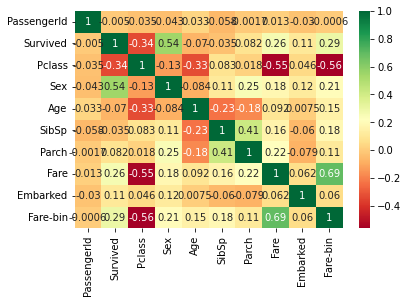

In [71]:
def corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    
corr(training_data)

since fare and fare-bin have strong negative correlation with Pclass so both variables are dropped from training & test datasets

In [72]:
training_data.drop(columns=['PassengerId','Name', 'Ticket', 'Title', 'Fare', 'Fare-bin'] , axis=1,inplace=True)
test_data.drop(columns=['PassengerId','Name', 'Ticket', 'Title', 'Fare', 'Fare-bin'] , axis=1,inplace=True)

In [73]:
training_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title group,Travel size
0,0,3,0,22.0,1,0,0,Mr,a. alone
1,1,1,1,38.0,1,0,1,Mrs,a. alone
2,1,3,1,26.0,0,0,0,Miss,a. alone
3,1,1,1,35.0,1,0,0,Mrs,b. 2 ppl
4,0,3,0,35.0,0,0,0,Mr,a. alone


In [74]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title group,Travel size
0,3,0,34.5,0,0,2,Mr,a. alone
1,3,1,47.0,1,0,0,Mrs,a. alone
2,2,0,62.0,0,0,2,Mr,a. alone
3,3,0,27.0,0,0,0,Mr,a. alone
4,3,1,22.0,1,1,0,Mrs,a. alone


In [75]:
training_data_dummies = pd.get_dummies(training_data)
training_data_dummies.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title group_Master,Title group_Miss,Title group_Mr,Title group_Mrs,Title group_other,Travel size_a. alone,Travel size_b. 2 ppl,Travel size_c. 3 ppl,Travel size_d. 4 ppl,Travel size_e. 5+ ppl
0,0,3,0,22.0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,1,1,1,38.0,1,0,1,0,0,0,1,0,1,0,0,0,0
2,1,3,1,26.0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,1,1,35.0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,3,0,35.0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [76]:
test_data_dummies = pd.get_dummies(test_data)
test_data_dummies.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title group_Master,Title group_Miss,Title group_Mr,Title group_Mrs,Title group_other,Travel size_a. alone,Travel size_b. 2 ppl,Travel size_c. 3 ppl,Travel size_d. 4 ppl,Travel size_e. 5+ ppl
0,3,0,34.5,0,0,2,0,0,1,0,0,1,0,0,0,0
1,3,1,47.0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,2,0,62.0,0,0,2,0,0,1,0,0,1,0,0,0,0
3,3,0,27.0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,3,1,22.0,1,1,0,0,0,0,1,0,1,0,0,0,0


PREPARING DATA FOR MODELLING

In [77]:
X_train = training_data_dummies.drop(columns = ['Survived'],axis=1)
X_train

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title group_Master,Title group_Miss,Title group_Mr,Title group_Mrs,Title group_other,Travel size_a. alone,Travel size_b. 2 ppl,Travel size_c. 3 ppl,Travel size_d. 4 ppl,Travel size_e. 5+ ppl
0,3,0,22.000000,1,0,0,0,0,1,0,0,1,0,0,0,0
1,1,1,38.000000,1,0,1,0,0,0,1,0,1,0,0,0,0
2,3,1,26.000000,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,1,35.000000,1,0,0,0,0,0,1,0,0,1,0,0,0
4,3,0,35.000000,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0,0,0,0,0,1,1,0,0,0,0
887,1,1,19.000000,0,0,0,0,1,0,0,0,1,0,0,0,0
888,3,1,29.699118,1,2,0,0,1,0,0,0,0,1,0,0,0
889,1,0,26.000000,0,0,1,0,0,1,0,0,1,0,0,0,0


In [78]:
Y_train = training_data_dummies['Survived']
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [79]:
X_test = test_data_dummies
X_test

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title group_Master,Title group_Miss,Title group_Mr,Title group_Mrs,Title group_other,Travel size_a. alone,Travel size_b. 2 ppl,Travel size_c. 3 ppl,Travel size_d. 4 ppl,Travel size_e. 5+ ppl
0,3,0,34.50000,0,0,2,0,0,1,0,0,1,0,0,0,0
1,3,1,47.00000,1,0,0,0,0,0,1,0,1,0,0,0,0
2,2,0,62.00000,0,0,2,0,0,1,0,0,1,0,0,0,0
3,3,0,27.00000,0,0,0,0,0,1,0,0,1,0,0,0,0
4,3,1,22.00000,1,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,0,0,0,1,0,0,1,0,0,0,0
414,1,1,39.00000,0,0,1,0,0,0,0,1,1,0,0,0,0
415,3,0,38.50000,0,0,0,0,0,1,0,0,1,0,0,0,0
416,3,0,30.27259,0,0,0,0,0,1,0,0,1,0,0,0,0


RUNNING DECISION TREES, SVM AND LOGISTIC MODEL ON TRAINING DATA

In [82]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

decision_tree = DecisionTreeClassifier()
scores_decision_trees = cross_val_score(decision_tree, X_train, Y_train, cv=10)
acc_decision_tree = scores_decision_trees.mean()

svc = SVC()
scores_svc = cross_val_score(svc, X_train, Y_train, cv=10)
acc_svc = scores_svc.mean()

lr = LogisticRegression(max_iter=1000)
scores_lr = cross_val_score(lr, X_train, Y_train, cv=10)
acc_lr = scores_lr.mean()



# Overview
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machines', 'Logistic Regression'],
    'Score': [acc_decision_tree, acc_svc, acc_lr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.823820
0,Decision Tree,0.775605
1,Support Vector Machines,0.654357


PREDICTING SURVIVED VARIABLE FOR TEST DATA

In [81]:
# Predicting Survived Varialbe for Test Data
log_reg = LogisticRegression(solver = "liblinear")
log_reg.fit(X_train, Y_train)
Y_test_lr = log_reg.predict(X_test)
lr_scores = cross_val_score(log_reg, X_test, Y_test_lr, cv = 10)
test_lr = lr_scores.mean()

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_test_dt = dt.predict(X_test)
dt_scores = cross_val_score(dt, X_test, Y_test_dt, cv=10)
test_decision_tree = dt_scores.mean()

sv = SVC()
sv.fit(X_train, Y_train)
Y_test_sv = sv.predict(X_test)
sv_scores = cross_val_score(sv, X_test, Y_test_sv, cv=10)
test_sv = sv_scores.mean()

# Overview
test_models = pd.DataFrame({
    'Test Model': ['Decision Tree', 'Support Vector Machines', 'Logistic Regression'],
    'Test_Score': [test_decision_tree, test_sv, test_lr]})
test_models.sort_values(by='Test_Score', ascending=False)




,Test Model,Test_Score
2,Logistic Regression,0.985482
1,Support Vector Machines,0.944890
0,Decision Tree,0.882811
